In [1]:
# pandas and numpy for tabular data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [5]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [15]:
df.dtypes

date            object
day             object
temperature    float64
rainfall       float64
flyers           int64
price          float64
sales            int64
dtype: object

In [8]:
#make columns more friendly
df.columns = df.columns.str.lower()

In [6]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    """
    This function takes a pandas Series and a multiplier (default 1.5) as input, and returns the lower and upper bounds for outlier detection using the IQR method.
    
    Args:
        series (pd.Series): A pandas Series containing numerical data.
        multiplier (float, optional): A multiplier used to determine the bounds for outlier detection. Defaults to 1.5.
    
    Returns:
        tuple: A tuple containing the lower and upper bounds for outlier detection.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    
    return lower_bound, upper_bound

In [20]:
for col in df:
    if df[col].dtype != 'object':
        return get_lower_and_upper_bounds(df[col])
        

SyntaxError: 'return' outside function (3214075355.py, line 3)

In [28]:
print(f'temp:{get_lower_and_upper_bounds(df.temperature)}')
print(f'rain:{get_lower_and_upper_bounds(df.rainfall)}')
print(f'flyers:{get_lower_and_upper_bounds(df.flyers)}')
print(f'price:{get_lower_and_upper_bounds(df.price)}')
print(f'sales:{get_lower_and_upper_bounds(df.sales)}')

temp:(16.700000000000003, 104.7)
rain:(0.26, 1.3)
flyers:(4.0, 76.0)
price:(0.5, 0.5)
sales:(5.0, 45.0)


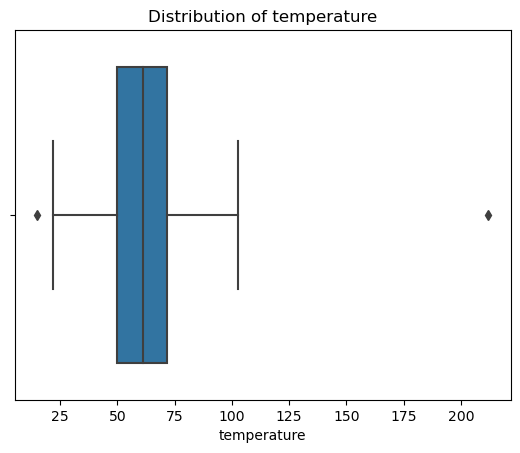

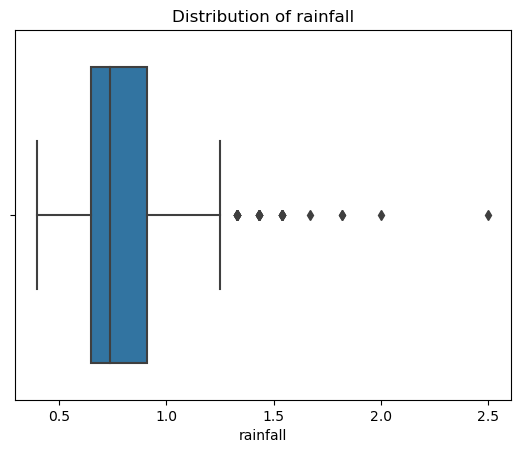

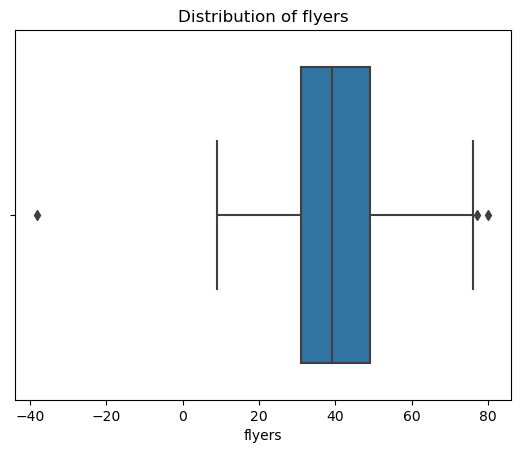

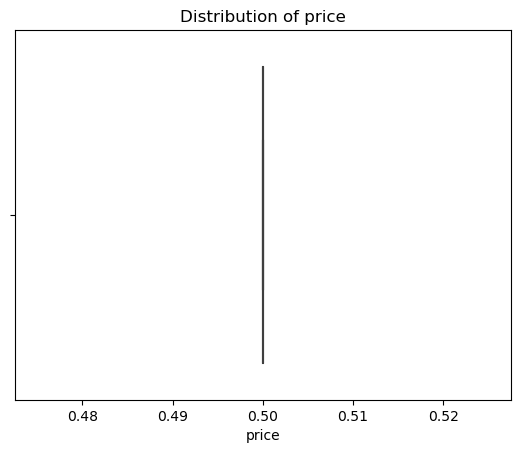

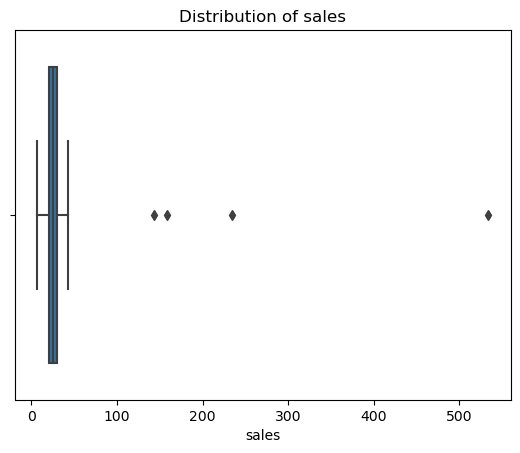

In [31]:
for col in df:
    if df[col].dtype != 'object':
        sns.boxplot(data=df, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

In [32]:
print(f'temp:{get_lower_and_upper_bounds(df.temperature,multiplier=3)}')
print(f'rain:{get_lower_and_upper_bounds(df.rainfall,multiplier=3)}')
print(f'flyers:{get_lower_and_upper_bounds(df.flyers,multiplier=3)}')
print(f'price:{get_lower_and_upper_bounds(df.price,multiplier=3)}')
print(f'sales:{get_lower_and_upper_bounds(df.sales,multiplier=3)}')

temp:(-16.299999999999997, 137.7)
rain:(-0.13, 1.69)
flyers:(-23.0, 103.0)
price:(0.5, 0.5)
sales:(-10.0, 60.0)


gonna need more data than that, we should use a multiplier of 3
drop flyer outliers

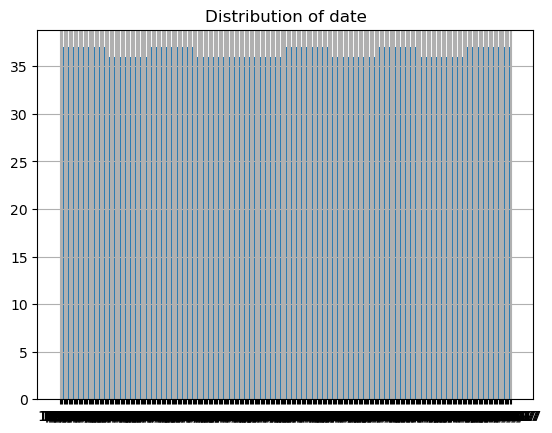

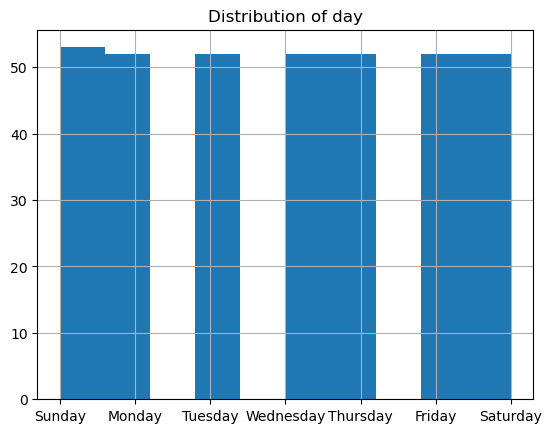

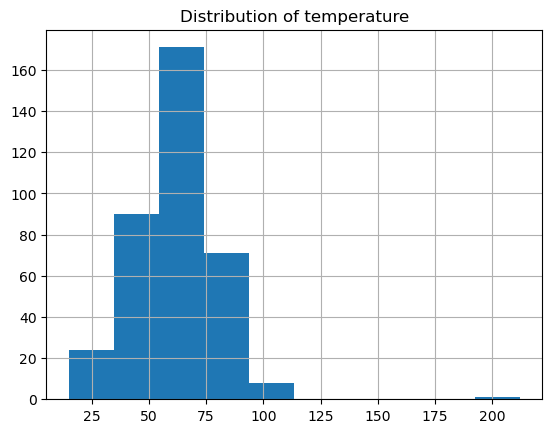

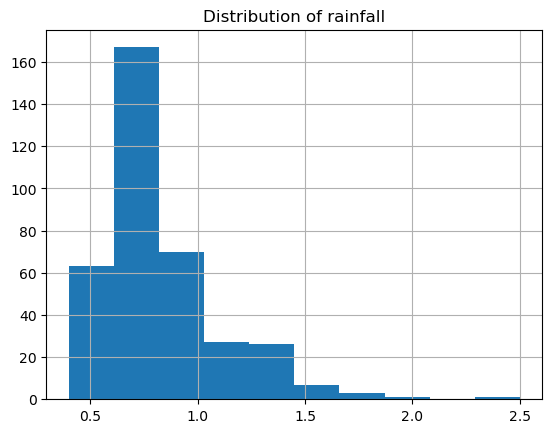

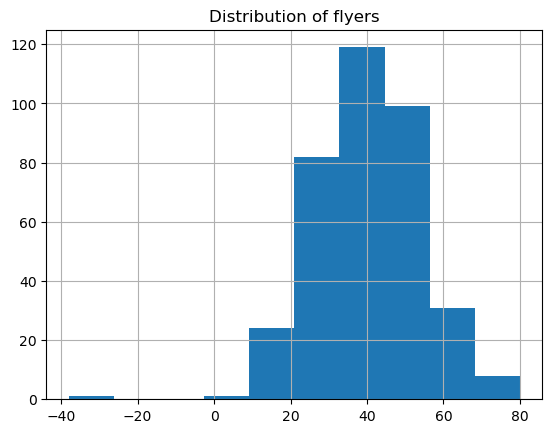

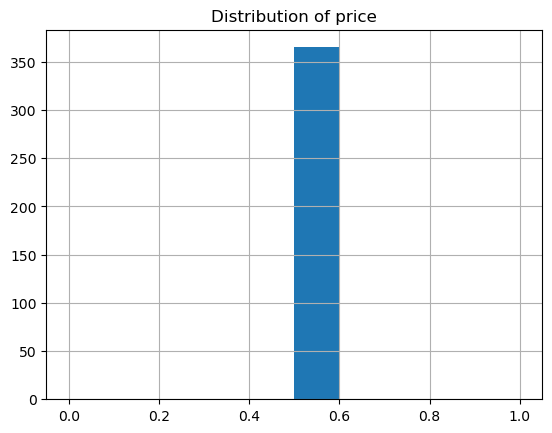

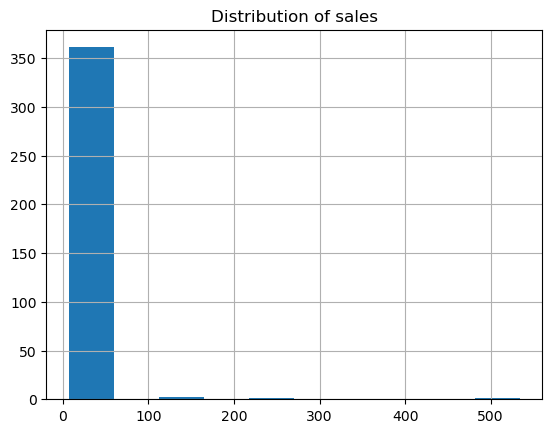

In [29]:
# brief visual analysis:
for col in df:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
df[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
df[zscores.abs() >= 3]


In [33]:
norm_cols = ['temperature', 'flyers']

In [34]:
def filter_by_sigma(df, norm_cols, sigma=2):
    """
    Filters a DataFrame based on the given normally distributed columns and sigma value.

    :param df: The input DataFrame
    :param norm_cols: List of normally distributed columns in the DataFrame
    :param sigma: The sigma value (default: 2)
    :return: A filtered DataFrame containing only the rows where the specified columns have values within the given sigma range
    """
    df_filtered = df.copy()

    for col in norm_cols:
        mean = df_filtered[col].mean()
        std = df_filtered[col].std()
        lower_bound = mean - (sigma * std)
        upper_bound = mean + (sigma * std)
        
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    df_filtered.reset_index(drop=True, inplace=True)
    return df_filtered

In [35]:
#sigma 2
filter_by_sigma(df,norm_cols)

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
341,12/26/17,Tuesday,28.9,1.43,23,0.5,13
342,12/27/17,Wednesday,42.7,1.00,33,0.5,19
343,12/28/17,Thursday,37.8,1.25,32,0.5,16
344,12/29/17,Friday,39.5,1.25,17,0.5,15


In [36]:
filter_by_sigma(df,norm_cols,sigma=3)

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
358,12/27/17,Wednesday,42.7,1.00,33,0.5,19
359,12/28/17,Thursday,37.8,1.25,32,0.5,16
360,12/29/17,Friday,39.5,1.25,17,0.5,15
361,12/30/17,Saturday,30.9,1.43,22,0.5,13
